# Plynty Bureau of Labor Statistics Consumer Expenditure Analysis

[BLS Comsumer Expenditure Survey](https://www.bls.gov/cex/home.htm)

[Interview Data Dictionary](https://www.bls.gov/cex/2015/csxintvwdata.pdf)

[Diary Data Dictionary](https://www.bls.gov/cex/2015/csxdiarydata.pdf)

### Where to download the BLS CE PUMD
- The zip files download automatically
- To download the Stub files open the links then right click and choose "Save As..."

[2015 interview zip file](https://www.bls.gov/cex/pumd/data/comma/intrvw15.zip)

[2015 diary zip file](https://www.bls.gov/cex/pumd/data/comma/diary15.zip)

[2015 IntStub file](https://www.bls.gov/cex/pumd/2014/csxintstub.txt)

[2015 IStub file](https://www.bls.gov/cex/pumd/2014/csxistub.txt)

[2015 DStub file](https://www.bls.gov/cex/pumd/2014/csxdstub.txt)

### This Scripts Goals for Plynty
- Create an easy to use analysis script for the BLS CE PUMD 
- Create a csv files that has average percentages spent on plynty categories for certain income classes
- Create incomeclasses that are stastically significant

##### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import subprocess
import math
import matplotlib.pyplot as plt
from plyntywidgets import *
from blsFunctions import *

### Setting Parameters
- year: the last two number associated with the year of the data
    for example for data from 2015: year = "15"
- minAge: the low bound (inclusive) of the age range you wish to subset by
- maxAge: the high bound (inclusive) of the age range you wish to subset by
- incomeBrackets: array of numbers that you wish to create the new income classes
    the bracketing works as follows (1,2], (2,3], (3,4]
- filesToRead: the strings of the abbreviations associated with the files you wish to read
    options are: "all", "diary", "interview", "dtbd", "expd", "fmld", "memd", "fmli", "itbi", "memi", "mtbi", "ntaxi"

In [2]:
year = "15"
# hard coding ages
# minAge = 55
# maxAge = 64
# filesToRead = ["fmli", "mtbi"]
incomeBrackets = [-math.inf,11000,20000,30000,43000,55000,69000,80000,100000,120000,150000,200000,250000,300000,math.inf]

# Display Cool widgets
display(ageRange, readFiles)

### Using the widgets to set values

In [3]:
# setting age range using the cool widget
minAge = ageRange.value[0]
maxAge = ageRange.value[1]
# setting the filesToRead using the cool widget
filesToRead = readFiles.value

### Setting Directory locations and FileNames on your Local Machine

In [4]:
# directory in which the diary and interview folders are held is located
diaryDir = "/Users/adyke/Vizuri/CE_PUMD/diary15/"
interviewDir = "/Users/adyke/Vizuri/CE_PUMD/intrvw15/"

# Directory where stubfiles are located
pathToStubFileDir = "/Users/adyke/Vizuri/Stubfiles/"
rScriptStubfilePathAndName = "/Users/adyke/Vizuri/BLS_Python_Analysis/creatingStubCsvs.R"

# Filenames of the Stubfiles
IStubFileName = "IStub2015.txt"
DStubFileName = "DStub2015.txt"
IntStubFileName = "IntStub2015.txt"

# name of interview dir within the interview dir
insideIntrvwDirName = "intrvw"

# name of the directory where you want the output percentages csv
outputDir = "/Users/adyke/Vizuri/outputFiles/"

### Reading in the files specified by FilesToRead

In [5]:
if(len(filesToRead)==0):
	print("The files to read variable is empty.")

# looping through each file to read
for file in filesToRead:
	if file == "dtbd" or file == "all" or file == "diary":
		dtbd = readFileSet("dtbd", diaryDir)
	if file == "expd" or file == "all" or file == "diary":
		expd = readFileSet("expd", diaryDir)
	if file == "fmld" or file == "all" or file == "diary":
		fmld = readFileSet("fmld", diaryDir)
	if file == "memd" or file == "all" or file == "diary":
		memd = readFileSet("memd", diaryDir)
	if file == "fmli" or file == "all" or file == "interview":
		fmli = readFileSet("fmli", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itbi" or file == "all" or file == "interview":
		itbi = readFileSet("itbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "itii" or file == "all" or file == "interview":
		itii = readFileSet("itii", interviewDir+insideIntrvwDirName+year+"/")
	if file == "memi" or file == "all" or file == "interview":
		memi = readFileSet("memi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "mtbi" or file == "all" or file == "interview":
		mtbi = readFileSet("mtbi", interviewDir+insideIntrvwDirName+year+"/")
	if file == "ntaxi" or file == "all" or file == "interview":
		ntaxi = readFileSet("ntaxi", interviewDir+insideIntrvwDirName+year+"/")
	# does not read form the expn or para subdirectories


### Using R to convert the Stub files into csv files

In [6]:
if os.path.isfile(pathToStubFileDir+"DStub.csv") and os.path.isfile(pathToStubFileDir+"IStub.csv") and os.path.isfile(pathToStubFileDir+"IntStub.csv"):
    print("Stubfiles Exist")
else:
    # converting the stub files via R 
    subprocess.call("Rscript "+rScriptStubfilePathAndName+" "+pathToStubFileDir+" "+IStubFileName+" "+DStubFileName+" "+IntStubFileName, shell=True)
    print("Stubfile Csvs created in "+pathToStubFileDir)

Stubfile Csvs created in /Users/adyke/Vizuri/Stubfiles/


### Reading and Cleaning the stubfile CSVs into pandas dataframes

In [7]:
# reading in the stubfiles
DStub = pd.read_csv(pathToStubFileDir+"DStub.csv")
IStub = pd.read_csv(pathToStubFileDir+"IStub.csv")
IntStub = pd.read_csv(pathToStubFileDir+"IntStub.csv")

# removing the index from the stufile
DStub = DStub.drop(DStub.columns[0], axis=1)
IStub = IStub.drop(IStub.columns[0], axis=1)
IntStub = IntStub.drop(IntStub.columns[0], axis=1)

# replacing * with 0 in the level columns
DStub.loc[DStub.level == "*", 'level'] = 0
IStub.loc[IStub.level == "*", 'level'] = 0
IntStub.loc[IntStub.level == "*", 'level'] = 0

### Creating the UCC roll ups for Plynty

In [8]:
# creating UCC rollups for the interview files for plynty categories
iTotalExp = categoricalUCCRollUp(IStub,["TOTALE"])
iFoodAtHome = categoricalUCCRollUp(IStub, ["FOODHO", "ALCHOM"])
iFoodAway = categoricalUCCRollUp(IStub, ["FOODAW", "ALCAWA"])
iHousing = categoricalUCCRollUp(IStub, ["HOUSIN"], ignoreUCCs = categoricalUCCRollUp(IStub, ["UTILS"]))
iUtilites = categoricalUCCRollUp(IStub, ["UTILS"])
iClothingAndBeauty = categoricalUCCRollUp(IStub, ["APPARE","PERSCA"])
iTransportation = categoricalUCCRollUp(IStub, ["TRANS"])
iHealthcare = categoricalUCCRollUp(IStub, ["HEALTH"])
iEntertainment = categoricalUCCRollUp(IStub, ["ENTRTA","READIN"])
iMiscellaneous = categoricalUCCRollUp(IStub, ["MISC","TOBACC"])
iCharitableAndFamilyGiving = categoricalUCCRollUp(IStub, ["CASHCO"])
iInsurance = categoricalUCCRollUp(IStub, ["LIFEIN"])
iEducation = categoricalUCCRollUp(IStub, ["EDUCAT"])
iHousingPrinciple = categoricalUCCRollUp(IStub,["MRTPRI"])

### Cleaning and reseting the indecies of the MTBI file

In [9]:
# restting the index
# mtbi.reset_index()

# Change mtbi UCC column to string
# needed for the loop through rollups
mtbi.UCC = mtbi.UCC.astype(str)

### Adding and Rolling up the MTBI Categories into mtbiRolledUp

In [10]:
rollupNames = ["iTotalExp","iFoodAtHome","iFoodAway","iHousing","iUtilites","iClothingAndBeauty","iTransportation","iHealthcare","iEntertainment","iMiscellaneous","iCharitableAndFamilyGiving","iInsurance","iEducation","iHousingPrinciple"]
rollups = [iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple]

mtbiRolledUp = rollUpDataframe(mtbi, rollupNames, rollups, negativeColumns=["iHousingPrinciple"], multiple=4)

mtbiTrimmed = mtbiRolledUp.loc[: , ['NEWID','iTotalExp','iFoodAtHome','iFoodAway','iHousing','iUtilites','iClothingAndBeauty','iTransportation','iHealthcare','iEntertainment','iMiscellaneous','iCharitableAndFamilyGiving','iInsurance','iEducation','iHousingPrinciple']]

I found a negative -4


### Creating the Sum for all expenditure category columns for each NEWID
Testing removing the rows that have 0 response for columns that we think are important

In [11]:
# adding up all columns for each new id
iExpensesByNewID = mtbiTrimmed.groupby(['NEWID'],as_index=False).sum()
# removing rows with zero values in key categories
nonZeroColumns = ['iFoodAtHome','iFoodAway','iHousing','iUtilites']
for column in nonZeroColumns:
    iExpensesByNewID = iExpensesByNewID[iExpensesByNewID[column] != 0]
iExpensesByNewID['iHousing'] = iExpensesByNewID['iHousing']+iExpensesByNewID['iHousingPrinciple']

### Subestting FMLI for age and recoding the incomebrackets

In [12]:
# subsetting for the age bracket
fmliAge = subsetDataframe(dataframe=fmli, columnName="AGE_REF", minValue=minAge, maxValue=maxAge)
fmliAge = fmliAge.reset_index()

# recoding the income brackets
fmliRecoded = binColumn(dataframe=fmliAge, toBinColumnName="FINCBTXM", binValues=incomeBrackets, binnedColumnName="INCLASS", labels=range(1,len(incomeBrackets)))

### Adding the Income class colum to the ExpensesByNewID dataframe

In [13]:
# combining the fmli and iExpensesByNewID
inclassExpenses = pd.merge(left=fmliRecoded[['NEWID','INCLASS']],right=iExpensesByNewID, on=['NEWID'])

### Averaging the expenditures based on incomebrackets

In [14]:
# getting mean for all columns with the same income class besides newId and creating new dataframe
inclassAverages = round(inclassExpenses.ix[: ,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).mean(),2)

# inclassAverages


### Median of the expenditures based on income brackets

In [15]:
inclassMedians = round(inclassExpenses.ix[:,inclassExpenses.columns != 'NEWID'].groupby(['INCLASS'],as_index=False).median(),2)
# inclassMedians

### Converting the Average expenditures for income classes into percentages of expenditures

In [16]:
# creating new dataframe for the percentages that only includes the plynty categories
percentages = inclassAverages.loc[:,rollupNames[1:]]
for column in rollupNames[1:]:
    percentages[column] = inclassAverages[column]/inclassAverages.iTotalExp
    
percentages

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.131886,0.066590,0.290843,0.101500,0.026746,0.168671,0.106250,0.057058,0.021890,0.046355,0.002804,0.001114,0.021706
1,0.139287,0.058106,0.306757,0.113760,0.027570,0.167590,0.089041,0.053154,0.016914,0.033781,0.004308,0.015016,0.025284
2,0.139203,0.062098,0.276772,0.103323,0.025925,0.182569,0.108871,0.062340,0.026186,0.026102,0.004636,0.006261,0.024287
3,0.129805,0.064351,0.279114,0.094477,0.029280,0.175372,0.112486,0.063223,0.027639,0.043683,0.005953,0.002715,0.028098
4,0.126034,0.063207,0.272018,0.097737,0.026748,0.212470,0.106827,0.058538,0.017832,0.038724,0.006247,0.005881,0.032262
5,0.116602,0.059898,0.286347,0.094286,0.031239,0.194396,0.119756,0.051148,0.023404,0.038399,0.007093,0.018212,0.040780
6,0.115605,0.059821,0.293193,0.085030,0.030774,0.201864,0.121270,0.057424,0.013061,0.037266,0.009924,0.015833,0.041066
7,0.109720,0.060312,0.307076,0.086876,0.027628,0.210327,0.107145,0.061942,0.016551,0.046634,0.010414,0.010902,0.055529
8,0.107397,0.066736,0.313717,0.085637,0.030373,0.198535,0.106032,0.064497,0.017613,0.045534,0.010484,0.014313,0.060869
9,0.100842,0.068627,0.345528,0.079308,0.033725,0.185834,0.091287,0.064782,0.015257,0.048297,0.007269,0.024916,0.065672


### Converting the Median expenditures for income classes into percentages of expenditures

In [17]:
# creating new dataframe for the percentages that only includes the plynty categories
percentagesM = inclassMedians.loc[:,rollupNames[1:]]
for row in range(len(percentagesM)):
    # creating the row total for "row"
    rowTotal = percentagesM.loc[row,percentagesM.columns != 'iTotalExp'].sum()
    # replacing each element with the percent
    for column in rollupNames[1:]:
        percentagesM.loc[row,column] = percentagesM.loc[row,column]/rowTotal
    
# dataframe that contains the percentages for medians
percentagesM

,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
0,0.174536,0.071381,0.357798,0.155068,0.018349,0.099575,0.070709,0.051466,0.001119,0.000000,0.0,0.0,0.000000
1,0.188020,0.062673,0.325178,0.161745,0.020971,0.113535,0.072556,0.055321,0.000000,0.000000,0.0,0.0,0.000000
2,0.178586,0.060114,0.314075,0.142148,0.018497,0.138726,0.097358,0.050496,0.000000,0.000000,0.0,0.0,0.000000
3,0.162722,0.061099,0.349619,0.128613,0.020340,0.125875,0.103305,0.043732,0.001878,0.002816,0.0,0.0,0.000000
4,0.160736,0.071438,0.328067,0.122682,0.022256,0.138068,0.099327,0.050007,0.001236,0.006182,0.0,0.0,0.000000
5,0.145413,0.061626,0.332660,0.120466,0.023702,0.132554,0.123553,0.045804,0.003555,0.010666,0.0,0.0,0.000000
6,0.142874,0.068035,0.348865,0.108752,0.024911,0.138374,0.096333,0.044223,0.000000,0.006280,0.0,0.0,0.021353
7,0.129685,0.061755,0.339841,0.108451,0.028170,0.128640,0.102323,0.046601,0.002850,0.016151,0.0,0.0,0.035533
8,0.128768,0.070517,0.335911,0.109891,0.028481,0.117376,0.102449,0.044198,0.001247,0.016216,0.0,0.0,0.044946
9,0.110494,0.059816,0.376526,0.095071,0.028897,0.113131,0.083537,0.046199,0.003034,0.018061,0.0,0.0,0.065235


### Creating Csv of percentages

In [18]:
# percentages.to_csv(outputDir+"plyntyCsv.csv")

# Exploratory in the data

### Graph of number of observations in the income brackets

[591 584 580 558 556 505 492 383 347 315 272 209 127  90]
5609


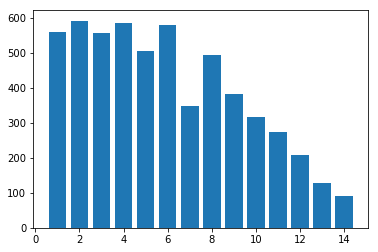

In [19]:
# ploting the number of people in each bracket
print(fmliRecoded['INCLASS'].value_counts().values)
print(fmliRecoded['INCLASS'].value_counts().values.sum())
plt.bar(list(fmliRecoded['INCLASS'].value_counts().index.tolist()), fmliRecoded['INCLASS'].value_counts().values, align='center')
plt.show()

### Checking the Standard Deviations

What I'm finding is that the higher income brackets (>150k) have high standard deviations for housing
this might have to do with the non reporting

In [20]:
# inclassSD = inclassExpenses.groupby(['INCLASS'],as_index=False).std()
# inclassSD.iloc[:,~inclassSD.columns.isin(['INCLASS','NEWID'])]

### Checking negative values for housing for incomeclasses

In [21]:
for inclass in range(len(incomeBrackets)-1):
    print(len(inclassExpenses.loc[inclassExpenses.iHousing <= 0].loc[inclassExpenses.INCLASS == inclass]))
inclassExpenses.loc[inclassExpenses.iHousing <= 0]

0
0
0
1
0
2
0
0
0
0
0
0
0
0


,NEWID,INCLASS,iTotalExp,iFoodAtHome,iFoodAway,iHousing,iUtilites,iClothingAndBeauty,iTransportation,iHealthcare,iEntertainment,iMiscellaneous,iCharitableAndFamilyGiving,iInsurance,iEducation,iHousingPrinciple
345,2997872,5,40896.0,7768.0,3272.0,-2572.0,6816.0,0.0,5424.0,5276.0,0.0,140.0,0.0,0.0,14772.0,0.0
971,2997873,3,13388.0,7780.0,3512.0,-12980.0,6916.0,400.0,3800.0,3600.0,0.0,360.0,0.0,0.0,0.0,0.0
2590,2997875,5,17228.0,8156.0,3532.0,-10180.0,6148.0,0.0,4532.0,3600.0,120.0,1320.0,0.0,0.0,0.0,0.0


### Looking deeper into housing and why its janky
- What im finding is that the negative values in the housing column stay consistent while the max values go up
- Negative values come from the housing principle
- The large negatives could happen when the iHousing reporting is 0 and they report the housing principle
- for some reason there is an issue with the 0 incomeclass

In [22]:
# max and min of housing per income class
for inclass in range(1,len(incomeBrackets)-1):
    print(inclass)
    print(inclassExpenses.iHousing.loc[inclassExpenses.INCLASS == inclass].describe())

1
count       285.000000
mean       8885.719298
std        9908.802726
min         190.000000
25%        3000.000000
50%        6396.000000
75%       10870.000000
max      100452.000000
Name: iHousing, dtype: float64
2
count      314.000000
mean      7802.646497
std       8773.711443
min         30.000000
25%       2927.000000
50%       5396.000000
75%       9550.000000
max      79576.000000
Name: iHousing, dtype: float64
3
count       392.000000
mean       9205.979592
std       11119.163524
min      -12980.000000
25%        3409.000000
50%        6792.000000
75%       10880.000000
max      100556.000000
Name: iHousing, dtype: float64
4
count      436.000000
mean     10321.944954
std       8396.444117
min        120.000000
25%       4645.000000
50%       8938.000000
75%      13660.000000
max      69796.000000
Name: iHousing, dtype: float64
5
count      419.000000
mean     11029.474940
std       8603.639679
min     -10180.000000
25%       4398.000000
50%       9552.000000
75%      15008